In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
churn_df=pd.read_csv("https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-2/Unit-2.2/ChurnData.csv")

In [16]:
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [18]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [20]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',  'callcard', 'wireless','churn']]

churn_df['churn']=churn_df['churn'].astype('int')

print(churn_df.shape)

churn_df.head()

(200, 10)


/tmp/ipykernel_495/2312915616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn']=churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [ ]:
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]

#X=X.drop(['tenure'],axis=1)

Y=churn_df[['churn']]

np_X=np.asanyarray(X)

np_Y=np.asanyarray(Y)

In [ ]:
from sklearn.preprocessing import StandardScaler ### Preprocess the data

std_scl=StandardScaler()

std_scl.fit(np_X)

np_X_procs=std_scl.transform(np_X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(np_X_procs, np_Y, test_size=0.2, random_state=4)

print ('Train set:', X_train.shape, Y_train.shape)

print ('Test set:', X_test.shape, Y_test.shape)

Train set: (160, 2) (160, 1)
Test set: (40, 2) (40, 1)


In [ ]:
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

[LibLinear]iter  1 act 9.100e-02 pre 9.068e-02 delta 3.578e-01 f 1.109e+00 |g| 5.087e-01 CG   1
iter  2 act 3.434e-05 pre 3.434e-05 delta 3.578e-01 f 1.018e+00 |g| 9.688e-03 CG   1
iter  3 act 3.005e-08 pre 3.005e-08 delta 3.578e-01 f 1.018e+00 |g| 2.884e-04 CG   1


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)

model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)



Y_pred=model.predict(X_test)

Y_pred_prob=model.predict_proba(X_test)

print(Y_pred)

print('\n')

print((Y_pred_prob))

[LibLinear]iter  1 act 9.100e-02 pre 9.068e-02 delta 3.578e-01 f 1.109e+00 |g| 5.087e-01 CG   1
iter  2 act 3.434e-05 pre 3.434e-05 delta 3.578e-01 f 1.018e+00 |g| 9.688e-03 CG   1
iter  3 act 3.005e-08 pre 3.005e-08 delta 3.578e-01 f 1.018e+00 |g| 2.884e-04 CG   1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0]


[[0.61376277 0.38623723]
 [0.54394612 0.45605388]
 [0.57823489 0.42176511]
 [0.62400344 0.37599656]
 [0.58457503 0.41542497]
 [0.52458913 0.47541087]
 [0.56761144 0.43238856]
 [0.52233537 0.47766463]
 [0.52458913 0.47541087]
 [0.55469486 0.44530514]
 [0.55898064 0.44101936]
 [0.56112028 0.43887972]
 [0.52675436 0.47324564]
 [0.5397218  0.4602782 ]
 [0.56974144 0.43025856]
 [0.48327925 0.51672075]
 [0.58457503 0.41542497]
 [0.55683881 0.44316119]
 [0.60963758 0.39036242]
 [0.56974144 0.43025856]
 [0.52016833 0.47983167]
 [0.5028116  0.4971884 ]
 [0.65990812 0.34009188]
 [0.46811962 0.53188038]
 [0.50932342 0.49067658]
 [0.6381544  0.3618456 ]

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model achieved a classification accuracy of:	0.575


Model Confusion Matrix


Jaccard Similarity Score:	0.05555555555555555


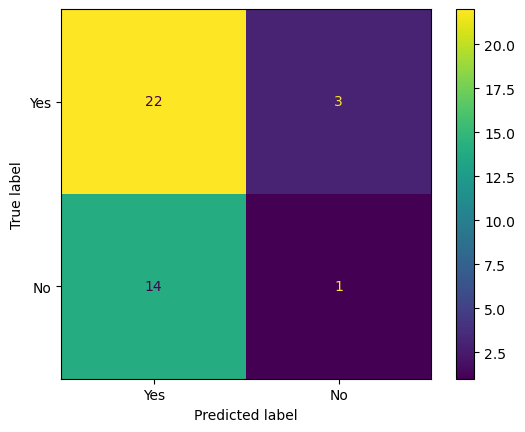

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

print("Model achieved a classification accuracy of:",end='\t')

print(accuracy_score(Y_test,Y_pred))

dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])

print('\n')

dsp.plot()

print("Model Confusion Matrix")

from sklearn.metrics import jaccard_score

print('\n')

print("Jaccard Similarity Score:", end='\t')

print(jaccard_score(Y_test,Y_pred))